<a href="https://colab.research.google.com/github/MOMO46-sust/edge-project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


data = [
    ["Tom", "STU-20301", "Real", 85, 95, "Yes"],
    ["Jerry", "STU-20302", "Real", 78, 82, "Yes"],
    ["Bob", "STU-20303", "Real", 92, 88, "Yes"],
    ["Alice", "STU-20304", "Real", 88, 74, "No"],
    ["Max", "STU-20305", "Real", 75, 45, "Yes"],
    ["Lily", "STU-20306", "Real", 89, 84, "No"],
    ["Jack", "STU-20307", "Real", 67, 65, "No"],
    ["Sam", "STU-20308", "Real", 48, 78, "Yes"],
    ["Eva", "STU-20309", "Real", 73, 70, "Yes"],
    ["Mia", "STU-20310", "Real", 56, 96, "Yes"]
]


columns = ["Student Name", "Student ID", "Subject", "Score", "Attendance Percentage", "Assignment Completion"]


df = pd.DataFrame(data, columns=columns)

df.to_csv("student_data.csv", index=False)



In [ ]:
import pandas as pd

data = pd.read_csv("student_data.csv")
print("Original Data:")
print(data)

data['Score'] = data['Score'] + 5

data.to_csv("updated_student_data.csv", index=False)
print("\nUpdated Data has been written to 'updated_student_data.csv'")


Original Data:
  Student Name Student ID Subject  Score  Attendance Percentage  \
0          Tom  STU-20301    Real     85                     95   
1        Jerry  STU-20302    Real     78                     82   
2          Bob  STU-20303    Real     92                     88   
3        Alice  STU-20304    Real     88                     74   
4          Max  STU-20305    Real     75                     45   
5         Lily  STU-20306    Real     89                     84   
6         Jack  STU-20307    Real     67                     65   
7          Sam  STU-20308    Real     48                     78   
8          Eva  STU-20309    Real     73                     70   
9          Mia  STU-20310    Real     56                     96   

  Assignment Completion  
0                   Yes  
1                   Yes  
2                   Yes  
3                    No  
4                   Yes  
5                    No  
6                    No  
7                   Yes  
8            

 Data Analysis and Manipulation

In [ ]:
import pandas as pd

data = pd.read_csv("student_data.csv")

average_score = data['Score'].mean()
min_score = data['Score'].min()
max_score = data['Score'].max()
print(f"\nAverage Score: {average_score}")
print(f"Minimum Score: {min_score}")
print(f"Maximum Score: {max_score}")

low_attendance_or_missing_assignments = data[(data['Attendance Percentage'] < 75) | (data['Assignment Completion'] == 'No')]
print("\nStudents with attendance < 75% or missing assignments:")
print(low_attendance_or_missing_assignments)

failing_students = data[data['Score'] < 50]
print("\nStudents failing the subject:")
print(failing_students)

data['Score'] = data['Score'].astype(int)

data.to_csv("updated_student_data.csv", index=False)
print("\nUpdated Data has been written to 'updated_student_data.csv'")



Average Score: 75.1
Minimum Score: 48
Maximum Score: 92

Students with attendance < 75% or missing assignments:
  Student Name Student ID Subject  Score  Attendance Percentage  \
3        Alice  STU-20304    Real     88                     74   
4          Max  STU-20305    Real     75                     45   
5         Lily  STU-20306    Real     89                     84   
6         Jack  STU-20307    Real     67                     65   
8          Eva  STU-20309    Real     73                     70   

  Assignment Completion  
3                    No  
4                   Yes  
5                    No  
6                    No  
8                   Yes  

Students failing the subject:
  Student Name Student ID Subject  Score  Attendance Percentage  \
7          Sam  STU-20308    Real     48                     78   

  Assignment Completion  
7                   Yes  

Updated Data has been written to 'updated_student_data.csv'


 Applying Functions and Logic


In [ ]:
import pandas as pd

data = pd.read_csv("student_data.csv")

def calculate_aggregate(row):
    score_weight = 0.7
    attendance_weight = 0.2
    assignment_factor = 10 if row['Assignment Completion'] == 'Yes' else 0
    aggregate_score = (row['Score'] * score_weight) + (row['Attendance Percentage'] * attendance_weight) + assignment_factor
    return aggregate_score

def determine_grade(aggregate_score):
    if aggregate_score >= 90:
        return "A"
    elif aggregate_score >= 75:
        return "B"
    elif aggregate_score >= 50:
        return "C"
    else:
        return "Fail"

def generate_report(row):
    aggregate_score = calculate_aggregate(row)
    grade = determine_grade(aggregate_score)
    return {
        "Student Name": row['Student Name'],
        "Student ID": row['Student ID'],
        "Subject": row['Subject'],
        "Score": row['Score'],
        "Attendance Percentage": row['Attendance Percentage'],
        "Assignment Completion": row['Assignment Completion'],
        "Aggregate Score": aggregate_score,
        "Grade": grade
    }

reports = data.apply(generate_report, axis=1)

report_df = pd.DataFrame(reports.tolist())

report_df.to_csv("student_performance_report.csv", index=False)

print(report_df)


   Student Name Student ID Subject  Score  Attendance Percentage  \
0           Tom  STU-20301    Real     85                     95   
1         Jerry  STU-20302    Real     78                     82   
2           Bob  STU-20303    Real     92                     88   
3         Alice  STU-20304    Real     88                     74   
4           Max  STU-20305    Real     75                     45   
5          Lily  STU-20306    Real     89                     84   
6          Jack  STU-20307    Real     67                     65   
7           Sam  STU-20308    Real     48                     78   
8           Eva  STU-20309    Real     73                     70   
9           Mia  STU-20310    Real     56                     96   
10     Bot Momo  STU-20345    Real     30                     20   

   Assignment Completion  Aggregate Score Grade  
0                    Yes             88.5     B  
1                    Yes             81.0     B  
2                    Yes         

 Visualization

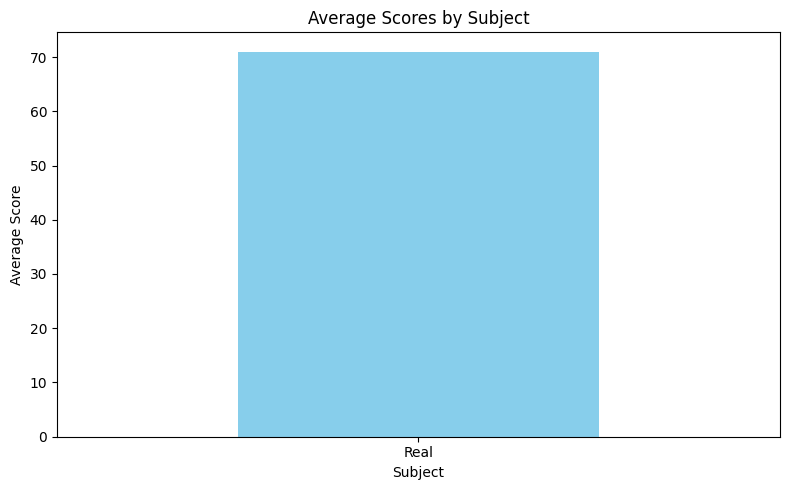

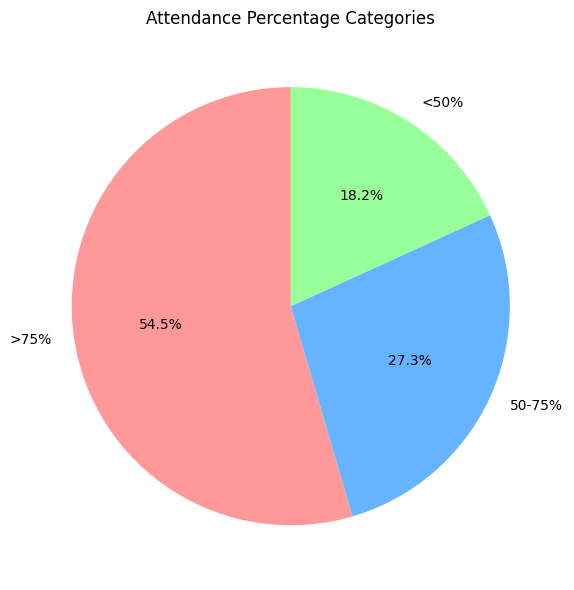

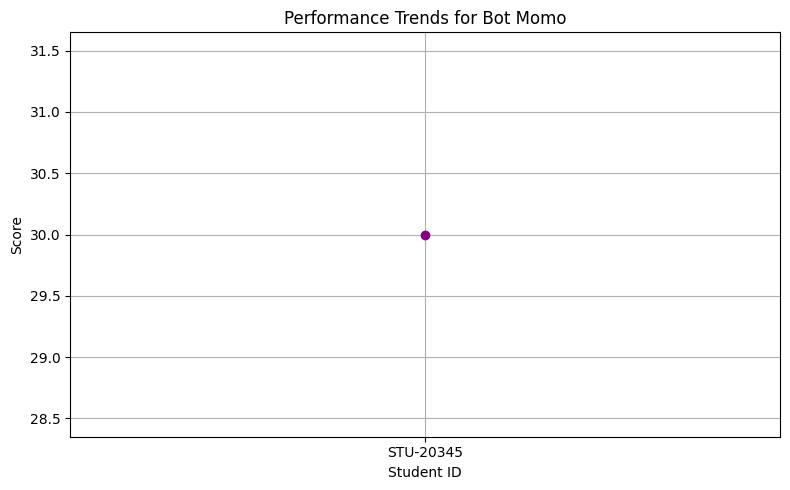

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("student_data.csv")

average_scores_by_subject = data.groupby('Subject')['Score'].mean()

plt.figure(figsize=(8, 5))
ax = average_scores_by_subject.plot(kind='bar', color='skyblue')




plt.title('Average Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

def attendance_category(attendance):
    if attendance < 50:
        return '<50%'
    elif 50 <= attendance < 75:
        return '50-75%'
    else:
        return '>75%'

data['Attendance Category'] = data['Attendance Percentage'].apply(attendance_category)

attendance_category_counts = data['Attendance Category'].value_counts()

plt.figure(figsize=(6, 6))
attendance_category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Attendance Percentage Categories')
plt.ylabel('')
plt.tight_layout()
plt.show()

selected_student = 'Bot Momo'
student_data = data[data['Student Name'] == selected_student].sort_values('Student ID')

plt.figure(figsize=(8, 5))
plt.plot(student_data['Student ID'], student_data['Score'], marker='o', color='purple')
plt.title(f'Performance Trends for {selected_student}')
plt.xlabel('Student ID')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()


interactive console

In [ ]:
import pandas as pd

def add_new_student(data, student_name, student_id, subject, score, attendance, assignment_completion):
    new_student = {
        "Student Name": student_name,
        "Student ID": student_id,
        "Subject": subject,
        "Score": score,
        "Attendance Percentage": attendance,
        "Assignment Completion": assignment_completion
    }

    new_student_df = pd.DataFrame([new_student])
    data = pd.concat([data, new_student_df], ignore_index=True)
    return data

def search_student(data, search_term):
    search_result = data[(data['Student Name'].str.contains(search_term, case=False)) | (data['Student ID'].str.contains(search_term, case=False))]
    return search_result

def update_student(data, student_id, score=None, attendance=None):
    student = data[data['Student ID'] == student_id]
    if student.empty:
        print(f"Student with ID {student_id} not found.")
        return data
    if score is not None:
        data.loc[data['Student ID'] == student_id, 'Score'] = score
    if attendance is not None:
        data.loc[data['Student ID'] == student_id, 'Attendance Percentage'] = attendance
    return data

def interactive_console():
    student_data = pd.read_csv("student_data.csv")

    while True:
        print("\nOptions: ")
        print("1. Add new student")
        print("2. Search for a student")
        print("3. Update student's score or attendance")
        print("4. Exit")
        choice = input("Choose an option (1/2/3/4): ")

        if choice == "1":
            student_name = input("Enter student's name: ")
            student_id = input("Enter student ID (e.g., STU-12345): ")
            subject = input("Enter subject: ")
            score = int(input("Enter score: "))
            attendance = int(input("Enter attendance percentage: "))
            assignment_completion = input("Is the assignment completed? (Yes/No): ")
            student_data = add_new_student(student_data, student_name, student_id, subject, score, attendance, assignment_completion)

        elif choice == "2":
            search_term = input("Enter student name or ID to search: ")
            result = search_student(student_data, search_term)
            if result.empty:
                print("No student found.")
            else:
                print("\nSearch Results:")
                print(result)

        elif choice == "3":
            student_id = input("Enter the student ID to update: ")
            score = input("Enter new score (or press Enter to skip): ")
            score = int(score) if score else None
            attendance = input("Enter new attendance percentage (or press Enter to skip): ")
            attendance = int(attendance) if attendance else None
            student_data = update_student(student_data, student_id, score, attendance)

        elif choice == "4":
            student_data.to_csv("student_data.csv", index=False)
            print("Data saved to 'student_data.csv'.")
            break
        else:
            print("Invalid choice. Please try again.")


interactive_console()



Options: 
1. Add new student
2. Search for a student
3. Update student's score or attendance
4. Exit
Choose an option (1/2/3/4): 1
Enter student's name: Bot Momo
Enter student ID (e.g., STU-12345): STU-20345
Enter subject: Real
Enter score: 30
Enter attendance percentage: 20
Is the assignment completed? (Yes/No): No

Options: 
1. Add new student
2. Search for a student
3. Update student's score or attendance
4. Exit
Choose an option (1/2/3/4): 4
Data saved to 'student_data.csv'.
